<div class="cite2c-biblio"></div><img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> INF-493 - Machine Learning</h1>
    <h1> Tarea 1 - Metodos Lineales para Regresión </h1>
</center>
<p>
<br><center>_Javier Reyes_<strong> - </strong>_javier.reyes.12@sansano.usm.cl_<strong> - </strong>_201273524-6_ </center>
<br><center>_Marco Salinas_<strong> - </strong>_marco.salinas.12@sansano.usm.cl_<strong> - </strong>_201273589-0_ </center>
</p>

# Introducción


#  1 Regresión Lineal Ordinaria (LSS)


<p  style="text-align: justify;"> 
    **(a)** Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó.
Explique por qué se realiza la línea 4.
</p>

In [74]:
 #!/usr/bin/env python -W ignore::DeprecationWarning
     #!/usr/bin/env python -W ignore::RuntimeWarning

import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<p  style="text-align: justify;">
    La función _drop_ utilizada en el código anterior, elimina las columnas "id", "date" y "zipcode" del dataframe, que anteriormente habiamos leido. Esto se realiza debido a que dichos atributos no son relevantes para el estudio del dataframe.
</p>

<p  style="text-align: justify;"> 
    **(b)** Describa brevemente el dataset a utilizar.
</p>

In [75]:
print(df.shape)
print("------------------------------------------")
df.info()
df.describe()

(21613, 18)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<p  style="text-align: justify;">
    El dataset posee $21613$ datos, los cuales poseen $18$ atributos cada uno donde describen las distintas caracteristicas de las casa, por ejemplo, el precio de venta de la casa, la cantidad de habitaciones y baños, la cantidad de metros cuadrados construidos, y los del terreno. Además, de otras especificaciones tecnicas como el año de construcción, el año de la ultima renovacion, el promedio de metros cuadrados construidos y de terreno de las 15 casas más cercanas. 
</p>

<p  style="text-align: justify;">
    Todos estos datos nos ayudarian a tomar decisiones sobre cual casa se deberia comprar.
</p>

<p  style="text-align: justify;">
    **(c)** Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir.
Explique la importancia/conveniencia de realizar estas dos operaciones.
</p>

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

<p  style="text-align: justify;">
    **(d)** Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del
paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.
</p>

In [77]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

<p  style="text-align: justify;">
    **(e)** Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables
están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo
que observa y cuál puede ser la causa?
</p>


In [78]:
import numpy as np
import scipy.stats as sc
N = Xtrain.shape[0]
p = Xtrain.shape[1]
X = Xtrain.as_matrix() #datos pasados a matriz
invXTX = np.linalg.inv(np.mat(X.T)*np.mat(X)) #matriz inversa de X.T*X 
b_hat_left = np.mat(invXTX)*np.mat(X.T) #matriz inversa de X.T*X por X.T
b_hat = np.squeeze(np.asarray(b_hat_left.dot(ytrain)))# inversa(X.T*X)*X.T*y
yhat_train = linreg.predict(Xtrain) # y gorro desde predicción regresión lineal aplicada a los datos X de entrenamiento
aux_sig = np.mean(np.power(yhat_train - ytrain, 2))#estimador de varianza 
cte = 1/(N-p-1) #N datos con p inputs
Naux_sig = N*aux_sig
est_sig = cte*Naux_sig#estimador de sigma
v_j = np.diag(invXTX)
wz = np.empty((18,2))
for i in range(0,18):
    wz[i][0] = b_hat[i]
    wz[i][1] = b_hat[i]/(np.power(est_sig*v_j[i],0.5))
df = pd.DataFrame(wz, columns = ["Peso","Z-score"])
df.index = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition",
"grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long","sqft_living15","sqft_lot15","intercept"] 
t_value = sc.t.ppf(1-0.05, N-p-1)
print("Intervalo de confianza con un 5%% de significancia aplicando t_student = [%f,%f]"%(-1*t_value,t_value))
df


Intervalo de confianza con un 5% de significancia aplicando t_student = [-1.644954,1.644954]


C:\Users\EntE\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


,Peso,Z-score
bedrooms,-0.064946,-23.827579
bathrooms,-0.014203,-3.719788
sqft_living,1.087774,NaN
sqft_lot,0.024447,8.381761
floors,0.032915,10.742579
waterfront,0.033531,14.787672
view,0.039418,16.289637
condition,0.040943,18.570889
grade,0.188438,48.642651
sqft_above,-1.578483,NaN


<p  style="text-align: justify;">
    Las variables más correlocionadas son: $grade = 0.233575$, $sqft-living15 = 0.085933$ y $floors = 0.08539$
    donde grade es la variable con más correlación con la respuesta.<br>
    Los <b><i>Z-Score</i></b> calculados se obtienen de la siguiente manera:
   <br><br><center>
   $\begin{eqnarray}
   z_j = \frac{\hat{\beta_j}}{\hat{\sigma} \sqrt{v_j}}
   \end{eqnarray}$
   </center><br><br>
   Donde:
   <center>
   $\begin{eqnarray}
      \hat{\beta_j} &=& (X^TX)^{-1}X^Ty \\
      v_j &=& Diag((X^TX)^{-1})\\
      \hat{\sigma^2} &=& \frac{1}{N-p-1}\sum_{i=1}^{N}(y_i - \hat{y_i})^2 
   \end{eqnarray}$
   </center><br><br>
    El comportamiento de los <b><i>Z-Score</i></b> está dominado una distribución <b><i>T-Student</i></b> con $N-p-1 = 15110$ grados de libertad, donde el intervalo de confianza que se obtiene para estos datos de entrenamiento y sus predicciones con grado de significancia del <b>5%</b>  es $[-1.644954,1.644954]$. Con esto se puede observar que hay 4 atributos que tiene valor absoluto menor a $1.644954$, los cuales son:<br><br>
    <li>$sqft-living = |8.031012e-07|$</li>
    <li>$sqft-above = |6.555770e-06|$</li>
    <li>$sqft-basement = |1.065057e-05|$</li>
    <li>$long = |1.58967e+00|$</li>
    <br>
    $\therefore$ Estos 4 atributos no son significantes para elegir qué casa comprar. 
</p>


<p  style="text-align: justify;">
    **(f)** Proponga un método para corregir lo observado (Hint: inspírese en los métodos de feature engineering
de las siguiente secciones). Verifíquelo mediante los Z-score presentados en la pregunta *(e)*.
</p>

In [79]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, Xtrain, ytrain,scoring="neg_mean_squared_error", cv=5)
lam = min(scores)#el mínimo cross validation para penalizar en los Ridge values
U, s, V = np.linalg.svd(X, full_matrices=False)#representación SVD de X
D = np.diag(s)
ridge_num = D.dot(U.T).dot(ytrain)
for i in range(0,D.shape[0]):
    ridge_num[i] = ridge_num[i]/(np.power(D[i][i],2)+lam)
for i in range(0,18):
    wz[i][0] = ridge_num[i]
    wz[i][1] = ridge_num[i]/(np.power(est_sig*v_j[i],0.5))
df = pd.DataFrame(wz, columns = ["Bridge Peso","Bridge Z-score"])
df.index = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition",
"grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long","sqft_living15","sqft_lot15","intercept"] 
df

C:\Users\EntE\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


,Bridge Peso,Bridge Z-score
bedrooms,-3.142498e-01,-1.152930e+02
bathrooms,-1.054373e+00,-2.761434e+02
sqft_living,-1.802416e+00,NaN
sqft_lot,1.353102e+00,4.639177e+02
floors,-1.212447e+00,-3.957109e+02
waterfront,4.731166e+00,2.086524e+03
view,1.137209e+01,4.699550e+03
condition,1.817138e+00,8.242249e+02
grade,-1.735030e+00,-4.478743e+02
sqft_above,8.114343e-01,NaN


<p  style="text-align: justify;">
    Para poder corregir la significancia de los Z-Score de los 4 atributos anteriormente nombrados, se utiliza la técnica de regresión <b><i>Ridge</i></b>, en donde se calculan los <b><i>Cross Validation</i></b> posibles y se escojé el mínimo para penalizar los pesos.<br><br>
    Primero se utiliza la descomposición $SVD$ de la matrix $X$, quedando la siguiente igualdad:
    <br><br><center>
    $\begin{eqnarray}
        X\hat{\beta}^{Ridge}_j &=& X(X^TX)^{-1}X^Ty\\
                               &=& UD(D^2+\lambda I)^{-1}DU^Ty\\
                               &=& \sum_{j=1}^{p}u_j\frac{d_j^2}{d^2_j + \lambda}u^Ty
     \end{eqnarray}$
    <br><br></center>
    Notar que al descomponer la matrix $X$ en su forma de $SVD$, se anula $U$ y $V$ debido a su ortonormalidad $U^TU=I$.<br>
    Una vez obtenido el $\lambda$, se reemplaza $\hat{\beta_j}$ por $\hat{\beta}^{Ridge}_j$,los cuales se calculan de la siguiente manera:
   <br><br><center>
   $\begin{eqnarray}
       \hat{\beta}^{Ridge}_j = \sum_{j=1}^{p}\frac{d_j}{d^2_j + \lambda}u^T_jy
   \end{eqnarray}$
   </center><br><br>
      Reemplazando los nuevos valores del estimador, se puede ver un cambio en los atributos en un orden de $10^5$. Aún así, no fue posible modificar la significancia de todos los atributos anteriormente descartados, el único atributo que alcanzó un valor absoluto mayor a $1.644954$ fue $long$.
</p>

<p  style="text-align: justify;">
    **(g)** Estime el error de predicción del modelo usando validación cruzada con un número de folds igual a $K
= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (_fold_) debería
reajustar los pesos del modelo. Mida el error real del modelo sobre el conjunto de pruebas, compare y
concluya.
</p>

In [80]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print('El error de predición real usando el test_set es %f'%mse_test)
from sklearn import cross_validation
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

k_fold = cross_validation.KFold(len(Xm),5)
mse_cv = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 5
print('El error de prediccion usando CV con K=5 es %f'%mse_cv)

k_fold = cross_validation.KFold(len(Xm),10)
mse_cv = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10
print('El error de prediccion usando CV con K=10 es %f'%mse_cv)

El error de predición real usando el test_set es 0.065259
El error de prediccion usando CV con K=5 es 0.064690
El error de prediccion usando CV con K=10 es 0.064683


<p  style="text-align: justify;">
    Si se utiliza $K=5$, en cada iteración habrá un $80\%$ de los datos para entrenar y $20\%$ para validar, en contraste con el 90% de datos de entranimiento y 10% de datos de validación con $K=10$. Al utilizar mayor cantidad de datos de entrenamiento habrá menor error, pero a costa del <b><i>overfitting</i></b> (sobreajuste al entrenamiento) que puede causar el entrenamiento con una cantidad considerable de datos.<br>
Al apreciar el error real respecto a los de predición de cross-validation, se observa que los resultados obtenidos son lo suficientemente buenos como para concluir qué casas comprar dependiendo de los atributos dados.
</p>

<p  style="text-align: justify;">
    **(h)** Mida los errores de predicción para cada dato de entrenamiento. Utilizando un "quantile-quantile plot"
determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.
</p>

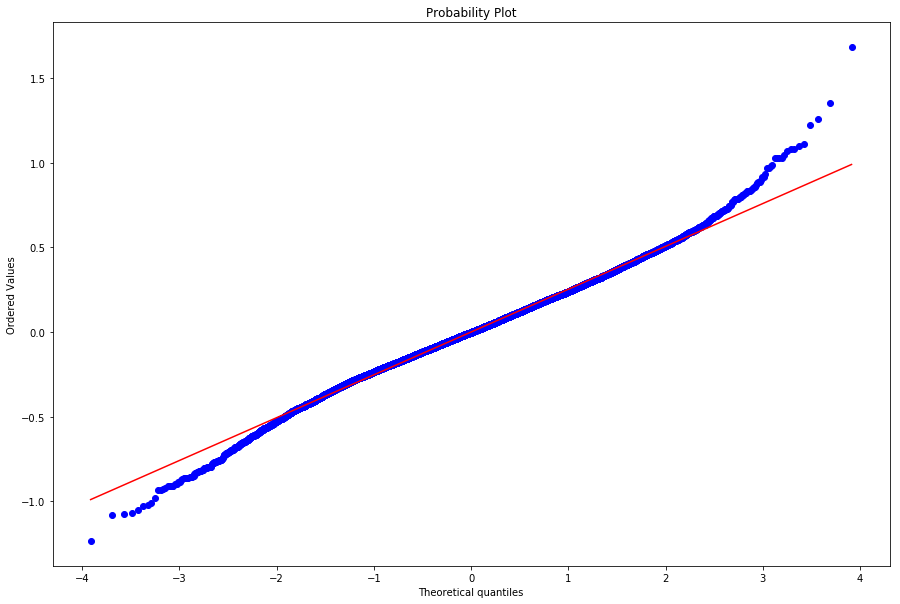

error promedio entre hipótesis de normalidad y datos de entrenamiento =  7.219084137331284e-15


In [81]:
import pylab
import scipy.stats as stats
%matplotlib inline
pylab.figure(figsize=(15,10))
errors = yhat_train - ytrain
stats.probplot(errors,dist="norm",plot=pylab)
pylab.show()
print("error promedio entre hipótesis de normalidad y datos de entrenamiento = ", abs(errors.mean()))

<p  style="text-align: justify;">
    Se puede apreciar en el gráfico, que hay una gran cantidad de datos que se aproximan a la hipótesis de normalidad, por lo que sugiere que los datos de entrenamientos son buenos para hacer estimaciones. Esto se puede corroborar al calcular la media de los errores de entrenamiento, la cual es de $0.00012944196138753425$.
</p>

#  2 Selección de Atributos


<p  style="text-align: justify;">
    **(a)** Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor.

</p>

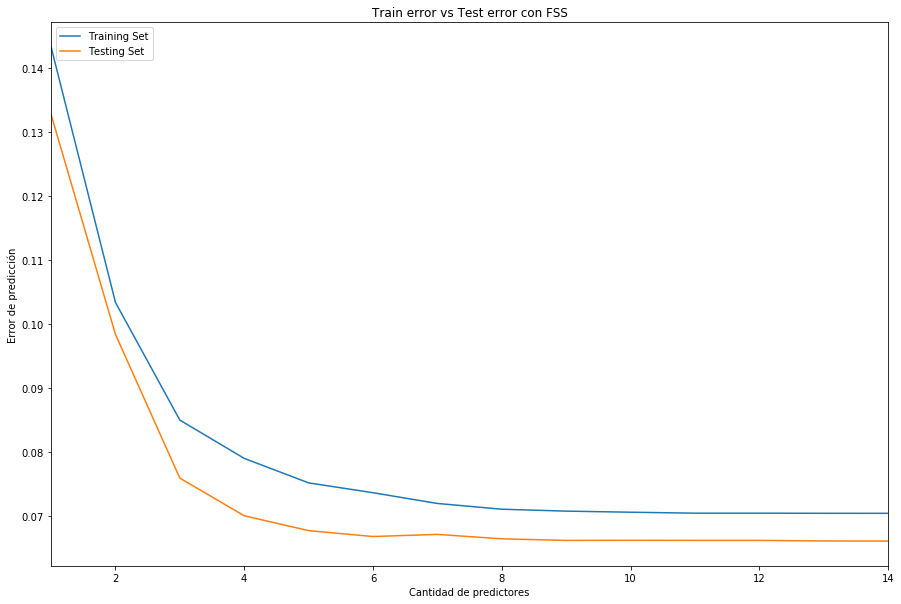

In [82]:
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(15,10))


def fss(x, y, names_x, test_data, k=10000):
    p = x.shape[1] - 1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    training_error = []
    test_error = []
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected) <= k:
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            X_train = x[:, indexes]
            model.fit(X_train, y)
            predicted_value_train = model.predict(X_train)
            residual_value_train = predicted_value_train - y
            X_test, y_test = test_data
            X_test = X_test[:, indexes]
            predicted_value_test = model.predict(X_test)
            residual_value_test = predicted_value_test - y_test
            mse_train = np.mean(np.power(residual_value_train, 2))
            mse_test = np.mean(np.power(residual_value_test, 2))
            var = (mse_train * X_train.shape[0]) / (X_train.shape[0] - X_train.shape[1] - 1)
            diag_values = np.diag(np.linalg.pinv(np.dot(X_train.T, X_train)))
            z_score = np.divide(model.coef_, np.sqrt(np.multiply(var, diag_values)))
            z_score_candidate = z_score[-1]
            score_candidates.append((z_score_candidate, mse_train, mse_test, candidate))
        score_candidates.sort()
        z_score, best_new_score_, mse_test_, best_candidate = score_candidates.pop()
        if best_candidate >= len(names_x):
            break
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        training_error.append((len(selected), best_new_score_))
        test_error.append((len(selected), mse_test_))
        #print("selected= %s..." % names_x[best_candidate])
        #print("totalvars=%d, mse = %f" % (len(indexes), best_new_score_))
    return selected, training_error, test_error

X = df_scaled.iloc[:,1:]
names_regressors = X.columns[:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xm_train = Xtrain.as_matrix()
ym_train = ytrain.as_matrix()
Xm_test = Xtest.as_matrix()
ym_test = ytest.as_matrix()
selected, points_training, points_test = fss(Xm_train, ym_train, names_regressors, (Xm_test, ym_test))
x_test= []
y_test= []
for x in points_test:
    x_test.append(x[0]-1)
    y_test.append(x[1])
x_train=[]
y_train=[]
for x in points_training:
    x_train.append(x[0]-1)
    y_train.append(x[1])
plt.plot(x_train, y_train, label='Training Set')
plt.plot(x_test, y_test, label='Testing Set')
plt.xlim(min(x_train), max(x_train))
plt.legend()
plt.xlabel('Cantidad de predictores')
plt.ylabel('Error de predicción')
plt.title('Train error vs Test error con FSS')
plt.legend(loc=2)
plt.show()

<p  style="text-align: justify;">
    Se utiliza primero que todo <b><i>FSS</i></b> para ir escogiendo los atributos que generan el menor error considerando los <b><i>Z-Score</i></b> como método de tolerancia.<br>
    Del gráfico se ve que ambos sets, tanto el de entrenamiento como el de testeo tienen muy poca variación, esto comprueba o reafirma la calidad de los datos de entrenamiento, ya que como se vio en el punto <b><i>h)</i></b>, el error entre los datos de entrenamiento y de testeo es muy pequeño, por lo que en este caso en específico, no ocurre un overfitting al considerar todas las variables en los datos de entrenamiento. <br>
    En el gráfico se plasma que el error de predicción disminuye conforme se agregan atributos, este comportamiento es consecuente con todos los resultados anteriormente obtenidos que califican a estos datos de entrenamientos como una buena elección para testearlos, ya que la diferencia de error entre los datos de entrenamiento y los de testeo es del orden de $10^{-2}$.
</p>

#  3 Regularización

<p  style="text-align: justify;">
    **(a)** Ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma $l_2$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^7, 10^1]$, variando si estima conveniente.
Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (WARNING: Note que la línea 3 y el primer argumento en la línea 9
son críticos).

</p>

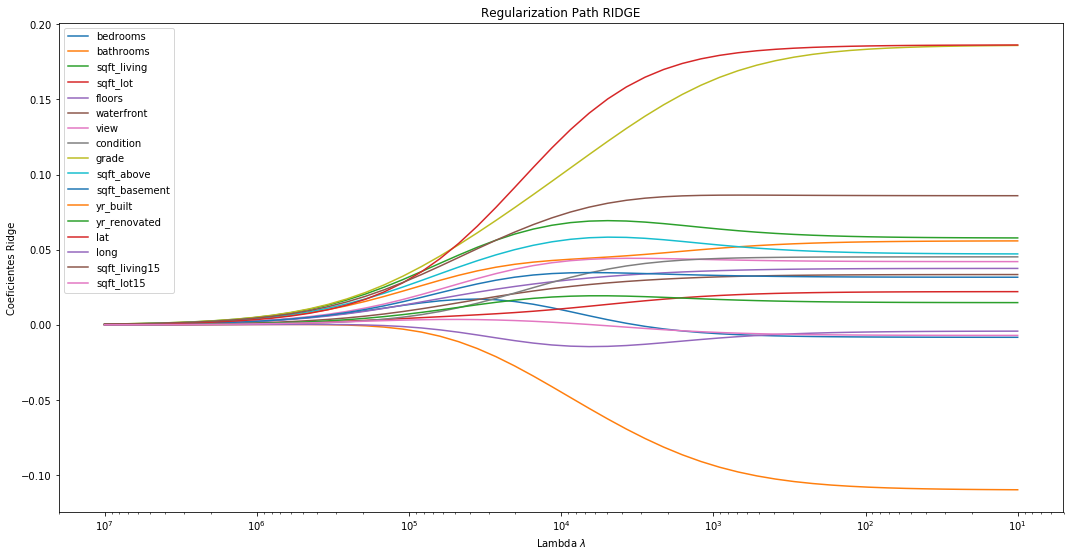

In [83]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize=(18,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
    plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Coeficientes Ridge')
plt.legend(loc=2)
plt.show()

<p  style="text-align: justify;">
    Como se vio en la pregunta 1.f), se utilizo el método Ridge Regression para mejorar los coeficientes, los cuales se calculaban de la siguiente forma:
    
    <br><br><center>
   $\begin{eqnarray}
       \hat{\beta}^{Ridge}_j = \sum_{j=1}^{p}\frac{d_j}{d^2_j + \lambda}u^T_jy
   \end{eqnarray}$
   </center><br><br>
   
   Es posible apreciar de forma gráfica, y a través de la ecuación del método Ridge que a mayor valor de $\lambda$ , mayor es el castigo a los coeficientes. Por lo que al usar un $\lambda$ en el rango $[10^7, 10^6]$ todos los coeficientes son cercanos a cero, y esto genera que no se pueda diferenciar cual de los atributos es significativamente más relevente. Mientras que a menores valores de $\lambda$ el castigo es menor por lo que se puede ver graficamente que atributos tienen mayor relevancia.
   
</p>



<p  style="text-align: justify;">
    **(b)** Ajuste un modelo lineal utilizando el método "Lasso", es decir, regularizando con la norma $l_1$. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^0, 10^-3]$. Para obtener el código, modifique
las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?.

</p>

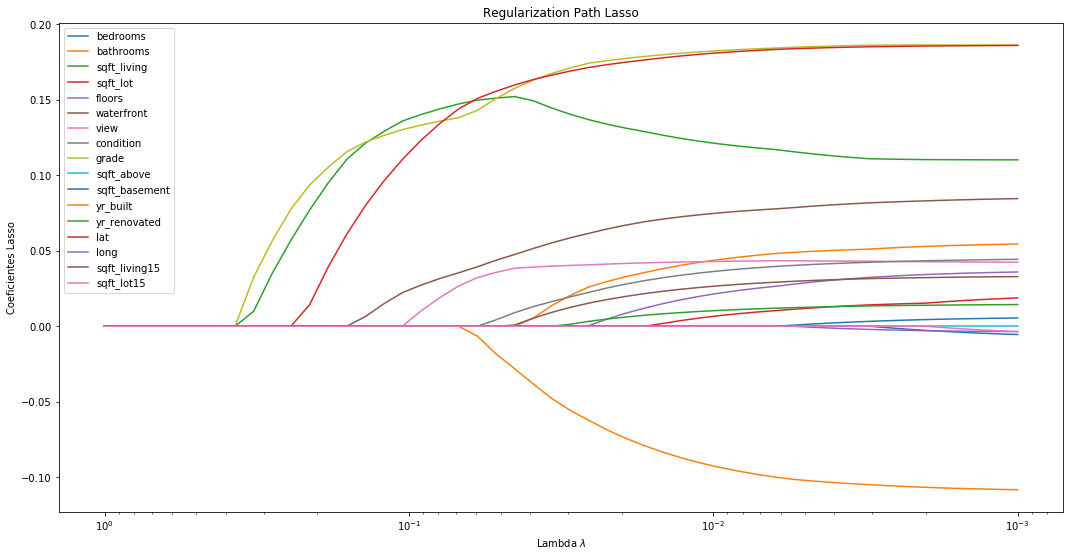

In [84]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
plt.figure(figsize=(18,9))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
    plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path Lasso')
plt.axis('tight')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Coeficientes Lasso')
plt.legend(loc=2)
plt.show()

<p  style="text-align: justify;">
    Para la utilización del método de Lasso, es neceserio utilizar el siguiente estimador de $\beta$:<br>
    
    <br><br><center>
   $\begin{eqnarray}
       \hat{\beta}^{Lasso} = \underset{\beta}{\arg\max} \left( \frac{1}{2} \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^{p} x_{ij}\beta_j )^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
   \end{eqnarray}$
   </center><br><br>
   
   donde la forma de castigar está definida por: 
   <br><br><center>
   $\begin{eqnarray}
        \lambda \sum_{j=1}^{p} |\beta_j| 
   \end{eqnarray}$
   </center><br><br>
   
   Al contrario de Ridge Regression, estos coeficientes se pueden castigar hasta anularlos completamente. Esta es la principal diferencia con el método ya nombrado, ya que Ridge castiga a los coeficientes irrelevantes minimizandolos pero no anulandolos, aun que esto puede generar un inconveniente al momento de selecionar atributos agrupados (que tienen correlación entre sí).
</p>
<p  style="text-align: justify;">
   Es posible apreciar de forma gráfica, y a través de la ecuación del método Lasso que a menor valor de $\lambda$ , mayor es el castigo a los coeficientes. Por lo que al usar un $\lambda$ en el rango menor a $10^{-1}$ todos los atributos con poca significancia son cercanos a cero, y esto permite que se pueda diferenciar cual de los atributos es significativamente más relevente.
   
</p>



<p  style="text-align: justify;">
    **(c)** Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un
gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de
regularizacion. Discuta lo que observa.
</p>

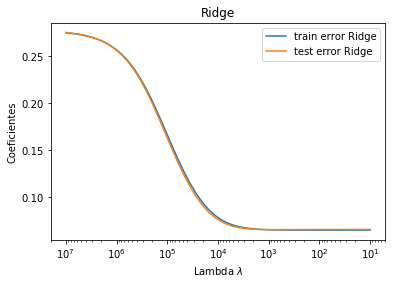

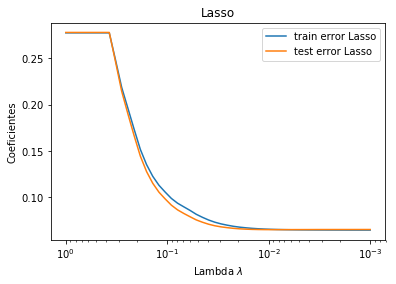

In [85]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10) #np.logspace(0,-3,base=10)
alphas_2 = np.logspace(0,-3,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')  #Lasso(fit_intercept=True) 
model2 = Lasso(fit_intercept=True) 
def splot(model,alphas_, title):
    mse_test = []
    mse_train = []
    for a in alphas_:
        model.set_params(alpha=a)
        model.fit(Xtrain, ytrain)
        yhat_train = model.predict(Xtrain)
        yhat_test = model.predict(Xtest)
        mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
        mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
    ax = plt.gca()
    ax.plot(alphas_,mse_train,label='train error ' + title)
    ax.plot(alphas_,mse_test,label='test error ' + title)
    plt.legend(loc=1)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.title(title)
    plt.xlabel('Lambda $\lambda$')
    plt.ylabel('Coeficientes')
    plt.show()

splot(model,alphas_, "Ridge")
splot(model2,alphas_2, "Lasso")


<p  style="text-align: justify;">
    Claramente en el primer gráfico se puede observar que el error del entrenamiento tiene el mismo comportamiento que el error del test. En cambio para el segundo método existe una diferencia entre el error de entrenamiento y el error de test.
</p>

<p  style="text-align: justify;">
    **(d)** Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de
la técnica validación cruzada.

</p>

In [86]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print ("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=10000000.000000, MSE(CV)=0.275499
BEST PARAMETER=7543120.063355, MSE(CV)=0.274855
BEST PARAMETER=5689866.029018, MSE(CV)=0.274008
BEST PARAMETER=4291934.260129, MSE(CV)=0.272894
BEST PARAMETER=3237457.542818, MSE(CV)=0.271436
BEST PARAMETER=2442053.094549, MSE(CV)=0.269531
BEST PARAMETER=1842069.969327, MSE(CV)=0.267057
BEST PARAMETER=1389495.494373, MSE(CV)=0.263865
BEST PARAMETER=1048113.134155, MSE(CV)=0.259777
BEST PARAMETER=790604.321091, MSE(CV)=0.254598
BEST PARAMETER=596362.331659, MSE(CV)=0.248125
BEST PARAMETER=449843.266897, MSE(CV)=0.240168
BEST PARAMETER=339322.177190, MSE(CV)=0.230586
BEST PARAMETER=255954.792270, MSE(CV)=0.219331
BEST PARAMETER=193069.772888, MSE(CV)=0.206492
BEST PARAMETER=145634.847750, MSE(CV)=0.192326
BEST PARAMETER=109854.114199, MSE(CV)=0.177258
BEST PARAMETER=82864.277285, MSE(CV)=0.161835
BEST PARAMETER=62505.519253, MSE(CV)=0.146650
BEST PARAMETER=47148.663635, MSE(CV)=0.132252
BEST PARAMETER=35564.803062, MSE(CV)=0.119077
BEST PA

<p  style="text-align: justify;">
    El mínimo <b><i>MSE</i></b> se obtiene con un lambda entre 30 y 40.
</p>


#  4 Drift

<p  style="text-align: justify;">
    En esta sección se presentarán dos muestras del dataframe utilizado en la actividades anteriores, donde cada
una de estas tiene una propiedad distinta ya que son muestreadas en función del valor a predecir (logaritmo
del precio de la casa). Por una parte se tiene una pequeña muestra A, la cual es extraída directamente de
los datos con los que se trabaja (manteniendo la distribución de esta) y la muestra B, es generada con el
propósito de que en cada intervalo del rango de valores haya la misma cantidad de datos aproximadamente
(simulando una distribución uniforme). El objetivo es familiarizarse con el concepto de _Transfer Learning_.
</p>

<p  style="text-align: justify;">
    El Aprendizaje por Transferencia (en inglés, _“Transfer Learning”_) es un problema de investigación en el aprendizaje automático que se centra en almacenar el conocimiento adquirido al resolver un problema y aplicarlo a otro problema diferente pero relacionado.
</p>

In [87]:
df_A = df_scaled.sample(1000,random_state=11)

frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
    
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

<p  style="text-align: justify;">
    **(a)** Cree el conjunto de entrenamiento y otro de validación para trabajar cada muestra mediante la técnica
de _hold out validation_.

</p>

In [88]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split

Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)


<p  style="text-align: justify;">
    **(b)** Evalúe los dos modelo de regresión lineal que se generan al entrenar con cada muestra. Mida el error
de cada modelo sobre ambos conjuntos de validación (A y B). Explique lo que observa.
</p>


In [89]:
from sklearn.metrics import mean_squared_error, accuracy_score

LR_A = lm.LinearRegression(fit_intercept = False)
LR_B = lm.LinearRegression(fit_intercept = False)

LR_A.fit(Xtrain_A, ytrain_A)
result_A = LR_A.predict(Xval_A)


LR_B.fit(Xtrain_B, ytrain_B)
result_B = LR_B.predict(Xval_B)

print ("Regresion lineal\nTrainA con Test de A: ",LR_A.score(Xval_A, yval_A),
       "\nTrainA con Test de B:",LR_A.score(Xval_B, yval_B),
       "\nPromedio TrainA: ", ((LR_A.score(Xval_B, yval_B)+LR_A.score(Xval_A, yval_A))/2),
      "\n")
print ("Regresion lineal\nTrainB con Test de A: ",LR_B.score(Xval_A, yval_A),
       "\nTrainB con Test de B: ",LR_B.score(Xval_B, yval_B),
      "\nPromedio TrainB: ", ((LR_B.score(Xval_B, yval_B)+LR_B.score(Xval_A, yval_A))/2))




Regresion lineal
TrainA con Test de A:  -526.211264682 
TrainA con Test de B: -184.030775241 
Promedio TrainA:  -355.121019962 

Regresion lineal
TrainB con Test de A:  -572.830161937 
TrainB con Test de B:  -124.685102287 
Promedio TrainB:  -348.757632112


<p  style="text-align: justify;">
    Según los scores calculados entre los distintos entrenamientos, y además con los distintos conjuntos de test se puede ver que el mejor conjunto de entrenamiento en promedio sería el entrenado con el conjunto A, utilizando el entrenamiento A.
</p>

<p  style="text-align: justify;">
    **(c)** Si tuviera que elegir uno de los dos modelos anteriores para trabajar con data futura, ¿Cuál eligiría y
por qué?

</p>

<p  style="text-align: justify;">
    Todo dependería de la distribución de la nueva data futura, pero en general los datos no presentan una distribución uniforme, por lo que convendría utilizar el entrenamiento realizado con el conjunto A, el cual está normalizado
</p>

#  5 Detectar enfermedades cardíacas

<p  style="text-align: justify;">
    En el área de la salud, diagnosticar a una persona de una enfermedad de forma rápida y correcta puede llegar
a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y
ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el medico se llegase a equivocar,
aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando
años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer
errores.
Pongámonos en el contexto de que usted es contratado para generar un modelo que prediga si es que un
paciente presenta una enfermedad cardiaca a partir de ciertos indicadores, tales como la edad, sexo, presión sanguínea, nivel de glicemia, etc. Los datos para trabajar junto a su documentación pueden ser descargados
ejecutando los siguientes comandos en un terminal (sistemas UNIX)
</p>

- wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
- wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

<p  style="text-align: justify;">
    Como ayuda se le indica que la variable de máximo ritmo cardíaco alcanzado (_maximum heart rate achieved_)
es un buen indicador de detección de enfermedades cardíacas. Por lo que el objetivo es predecir el comportamiento
de esta variable en función de las otras, y con esto detectar qué tan distante es el valor real al valor
predecido para así luego detectar los posibles _outliers_ (enfermos), que en sí corresponden a pacientes que
tienen un comportamiento anormal al resto.

</p>

<p  style="text-align: justify;">
   **(a)** Lea el archivo de datos, cárguelos en un dataframe o matriz, luego divida el dataframe en dos, un
dataframe de entrenamiento (70% Datos) y un dataframe de prueba (30% Datos).

</p>

In [90]:
headers = ["age","sex","chest_pain","blood_p","serum","blood_s","electro","max_heart","angina"
           ,"oldpeak","slope","vessel","thal","normal"]


df1 = pd.read_table("heart.dat", header=None, names=headers, sep=" ", engine="python")
mx = df1["max_heart"]


#variable normal: Absence (1) or Presence (2) of Heart Disease
train, test, goal_train, goal_test = train_test_split(df1[headers], mx, test_size=0.3, random_state=0)

mh = train["max_heart"]
nm_train = train["normal"]
nm_test = test["normal"]
train.drop(["max_heart","normal"],axis=1,inplace=True)
test.drop(["max_heart","normal"],axis=1,inplace=True)


df1.describe()


,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


<p  style="text-align: justify;">
   **(b)** Realice una regresión lineal y defina usted una frontera de decisión (umbral) para poder determinar si
es que estamos en presencia o no de una enfermedad cardíaca. Mida su desempeño con ambos conjuntos
de datos.

</p>

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.qda import QDA
from sklearn.lda import LDA
import matplotlib.pylab as plt

LR_N = QDA()
LR_N.fit(mh.values.reshape(-1, 1), nm_train)
result_N = np.rint(LR_N.predict(50))


LR = lm.LinearRegression()
LR.fit(train, goal_train)


result_train = np.rint(LR.predict(train))
result_test = np.rint(LR.predict(test))

result_F = []
for i in result_test:
    result_F.append(np.rint(LR_N.predict(i)[0]))


dif_cuadrada = ((goal_test - result_test)**2)

j = 529 #varianza max heart
lala = dif_cuadrada.apply(lambda x: (2 if x > j else 1))

print ("QDA Score: {:8.8f}".format(accuracy_score(nm_test , result_F)))
print ("Valor Umbral Score: {:8.8f}".format(accuracy_score(nm_test , lala)))



QDA Score: 0.64197531
Valor Umbral Score: 0.65432099


<p  style="text-align: justify;">
    El método QDA clasifica con 0.64 la cantidad de enfermos. Y el Valor Umbral, en donde el umbral que se utilizó fue la varianza de el atributo "max_heart."

</p>

<div id='obj' />
# Referencias

<ul style="text-align: justify;">
    <li>https://www.kaggle.com/harlfoxem/housesalesprediction/data</li>
    <li>https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html</li>
    <li>http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</li>
    <li>https://fisicamatematic.wordpress.com/2011/11/04/minimos-cuadrados</li>
    <li>Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition.
Springer New York Inc.</li>
</ul>